Color each province with a different color:

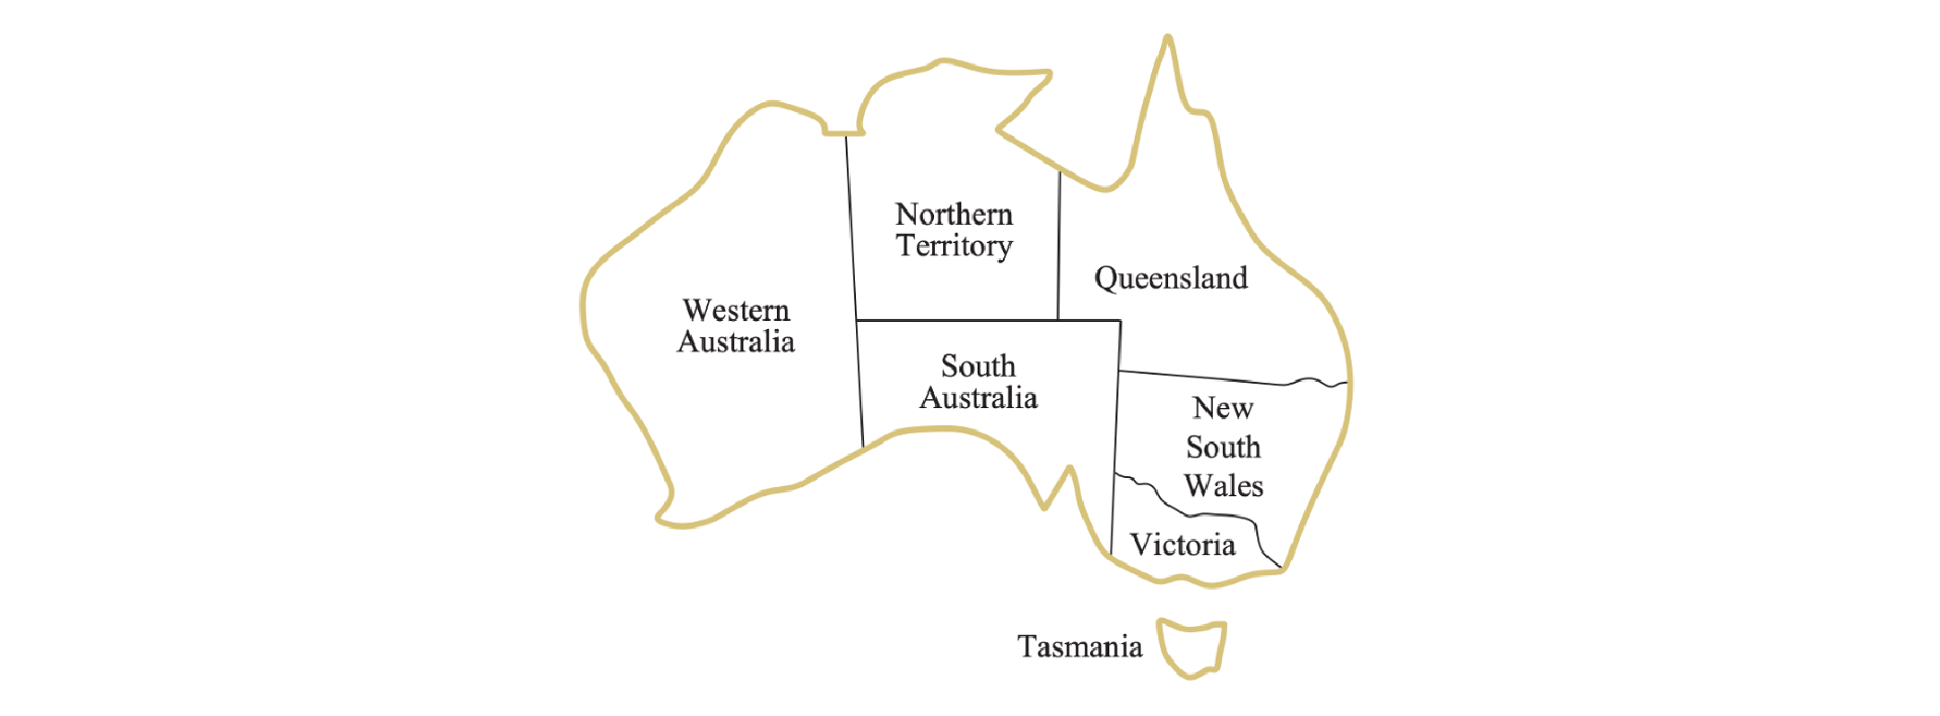

In [1]:
from copy import deepcopy

In [2]:
variables = ['WA', 'NT', 'Q', 'SA', 'NSW', 'V', 'T']

domains = {x: ['red', 'green', 'blue'] for x in variables}

constraints = {
    'WA': ['NT', 'SA'],
    'NT': ['WA', 'SA', 'Q'],
    'SA': ['WA', 'NT', 'Q', 'NSW', 'V'],
    'Q': ['NT', 'SA', 'NSW'],
    'NSW': ['Q', 'SA', 'V'],
    'V': ['SA', 'NSW'],
    'T': []
}

In [3]:
class MapColoringCSP:
    def __init__(self, variables, domains, neighbors):
        self.variables = variables
        self.domains = domains
        self.neighbors = neighbors
        
        self.n_nodes_generated = 0

    def is_complete(self, assignment):
        return len(assignment) == len(self.variables)

    def check_consistency(self, assignment, variable, value):
        # assignment: {'WA': 'red'}
        # variable: 'NT' (neighbors: 'NT': ['WA', 'SA', 'V', 'NSW', 'Q'],)
        # value: 'blue'
        for neighbor in self.neighbors[variable]:
            if neighbor in assignment and assignment[neighbor] == value:
                return False
        return True

    def forward_checking(self, variable, assignment, domains):
        for neighbor in self.neighbors[variable]:
            invalid_values = []
            for v in domains[neighbor]:
                if not self.check_consistency(assignment, neighbor, v):
                    invalid_values.append(v)

            # remove invalid values from domain
            domains[neighbor] = [x for x in domains[neighbor] if x not in invalid_values]
            
            # if domain is empty, return None.
            if len(domains[neighbor]) == 0:
                return None
        return domains

    def backtrack(self, assignment, domains):
        if self.is_complete(assignment):
            return assignment

        # select a variable
        unassigned_variables = [x for x in self.variables if x not in assignment]
        if len(unassigned_variables) == 0:
            return None
        x = unassigned_variables[0]
        
        for v in domains[x]:
            # check consistency
            if not self.check_consistency(assignment, x, v):
                continue
            
            new_assignment = deepcopy(assignment)
            new_assignment[x] = v
            self.n_nodes_generated += 1
            
#             perform forward checking
            new_domains = deepcopy(domains)
#             new_domains[x] = [v]
#             new_domains = self.forward_checking(x, new_assignment, new_domains)  # return None if any variable has an empty domain.
#             if new_domains is None:
#                 print('empty domain detected.')
#                 continue
                
            result = self.backtrack(new_assignment, new_domains)
            if result is not None:
                return result

In [5]:
csp = MapColoringCSP(variables, domains, constraints)
result = csp.backtrack({}, domains)
print(result)
# print('Number of nodes generated:', csp.n_nodes_generated)

{'WA': 'red', 'NT': 'green', 'Q': 'red', 'SA': 'blue', 'NSW': 'green', 'V': 'red', 'T': 'red'}
Number of nodes generated: 7


In [45]:
csp = MapColoringCSP(variables, domains, constraints)
%timeit result = csp.backtrack({}, domains)
print(result)
print('Number of nodes generated:', csp.n_nodes_generated)

95.5 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
{'WA': 'red', 'NT': 'green', 'SA': 'blue', 'Q': 'red', 'NSW': 'green', 'V': 'red', 'T': 'red'}
Number of nodes generated: 567777
